In [1]:
import pandas as pd
import networkx as nx
import random

# Loading csv instagram data. We are loading this from independent cascade data as partial edges information is available in it.
csv_dataframe = pd.read_csv('D:\\2-1\\SMA\\Project\\Network for IC LT.csv')

# Creating a graph with given edges
insta_graph = nx.from_pandas_edgelist(csv_dataframe, 'source', 'target')

# Local & global Clustering Coefficients
local_clustering = nx.clustering(insta_graph)

# Sort nodes by clustering coefficient in descending order
high_to_low_clusteredNodess = sorted(local_clustering.items(), key=lambda x: x[1], reverse=True)

top_5_nodes = high_to_low_clusteredNodess[:5]
random_nodes = random.sample(list(insta_graph.nodes()), 5)

# Top 5 nodes with local clustering coefficients
for node, coeff in top_5_nodes:
    print(f"Node {node}: {coeff}")
    
print("Local clustering coefficients of 5 random nodes:")
for node in random_nodes:
    print(f"Node {node}: {local_clustering[node]}")
global_clustering = nx.average_clustering(insta_graph)

print(f"Global Clustering Coefficient: {global_clustering}")

communities = list(nx.community.label_propagation_communities(insta_graph))           # Ref : Label propagation algorithm https://neo4j.com/docs/graph-data-science/current/algorithms/label-propagation/

# Sorting communities by size
communities_sorted = sorted(communities, key=len, reverse=True)

# Returning top 3 communities
for i, community in enumerate(communities_sorted[:3]):
    community_list = list(community)
    print(f"Community {i + 1}: \n Total Nodes: {len(community_list)} \n Nodes: {random.sample(community_list, min(10, len(community_list)))}\n ")


Node 3995: 1.0
Node 46272: 1.0
Node 1514: 1.0
Node 1528: 1.0
Node 1530: 1.0
Local clustering coefficients of 5 random nodes:
Node 64945: 0
Node 38637: 0.022222222222222223
Node 67650: 0
Node 2690: 0.07971014492753623
Node 38828: 0.2222222222222222
Global Clustering Coefficient: 0.12830556164611326
Community 1: 
 Total Nodes: 69600 
 Nodes: [46889, 10728, 69534, 49881, 7034, 41486, 21046, 46205, 58240, 46076]
 
Community 2: 
 Total Nodes: 160 
 Nodes: [45812, 46858, 46431, 1790, 1755, 47040, 46836, 45813, 46832, 46944]
 
Community 3: 
 Total Nodes: 68 
 Nodes: [60202, 60241, 60242, 60215, 60209, 60214, 60365, 60210, 60244, 53626]
 


In [2]:
import pandas as pd
import networkx as nx

# Loading csv instagram data. We are loading this from independent cascade data as partial edges information is available in it.
csv_dataframe = pd.read_csv('D:\\2-1\\SMA\\Project\\Network for IC LT.csv')
# Creating a graph with given edges
insta_graph = nx.from_pandas_edgelist(csv_dataframe, 'source', 'target')
pageranks = nx.pagerank(insta_graph)

# Sorting nodes by their PageRank values
sorted_pageranks = sorted(pageranks.items(), key=lambda item: item[1], reverse=True)

# Printing the top 10 nodes with the highest PageRank values
print("Top 10 nodes by PageRank:")
for node, rank in sorted_pageranks[:10]:
    print(f"Node {node}: PageRank {rank}")

print("\n")

# Printing the bottom 10 nodes with the lowest PageRank values
print("Bottom 10 nodes by PageRank:")
for node, rank in sorted_pageranks[-10:]:
    print(f"Node {node}: PageRank {rank}")

Top 10 nodes by PageRank:
Node 41643: PageRank 0.003917214031527484
Node 29422: PageRank 0.0036509658027095346
Node 50222: PageRank 0.0026028690916554274
Node 56340: PageRank 0.0025358293829855203
Node 5095: PageRank 0.002166547359919622
Node 69: PageRank 0.0020733281638160113
Node 17600: PageRank 0.0016603254149456072
Node 69959: PageRank 0.0016364311041782572
Node 5124: PageRank 0.001569752695106456
Node 48558: PageRank 0.0013664980324245156


Bottom 10 nodes by PageRank:
Node 50157: PageRank 2.463704993413278e-06
Node 48785: PageRank 2.462818741162789e-06
Node 54385: PageRank 2.462122611598468e-06
Node 68082: PageRank 2.4598936030056045e-06
Node 62711: PageRank 2.4577212527117794e-06
Node 52062: PageRank 2.4565299725518784e-06
Node 54227: PageRank 2.452979128311568e-06
Node 52802: PageRank 2.4524597560104193e-06
Node 51230: PageRank 2.4500473447806358e-06
Node 54038: PageRank 2.4499792994365115e-06


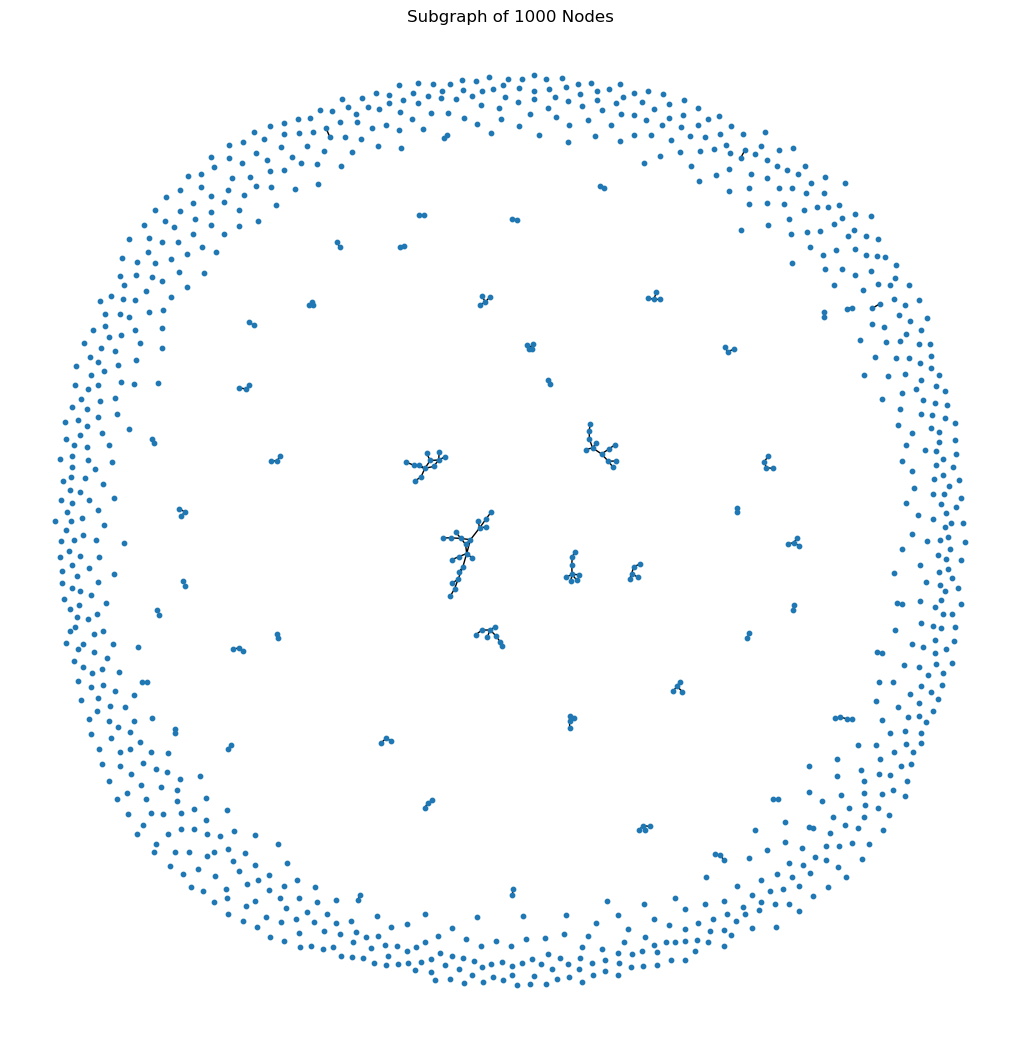

Number of nodes in the giant component: 70316
Number of edges in the giant component: 865835
Number of nodes in the giant component of subgraph: 21
Number of edges in the giant component of subgraph: 22


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd


# Loading csv instagram data. We are loading this from independent cascade data as partial edges information is available in it.
csv_dataframe = pd.read_csv('D:\\2-1\\SMA\\Project\\Network for IC LT.csv')

# Creating a graph with given edges
insta_graph = nx.from_pandas_edgelist(csv_dataframe, 'source', 'target')

# Extracting a subgraph with 1000 nodes
selected_nodes = random.sample(list(insta_graph.nodes()), 1000)
subgraph_insta = insta_graph.subgraph(selected_nodes)

# Plotting the subgraph extracted from main graph
plt.figure(figsize=(10, 10))
nx.draw(subgraph_insta, with_labels=False, node_size=10)
plt.title("Subgraph of 1000 Nodes")
plt.show()

# Computing the giant (largest) connected component of original graph
connected_components = sorted(nx.connected_components(insta_graph), key=len, reverse=True)
giant_component = insta_graph.subgraph(connected_components[0])

print(f"Number of nodes in the giant component: {giant_component.number_of_nodes()}")
print(f"Number of edges in the giant component: {giant_component.number_of_edges()}")

# Computing the giant (largest) connected component of sub graph
connected_components = sorted(nx.connected_components(subgraph_insta), key=len, reverse=True)
giant_component_subgraph = subgraph_insta.subgraph(connected_components[0])
print(f"Number of nodes in the giant component of subgraph: {giant_component_subgraph.number_of_nodes()}")
print(f"Number of edges in the giant component of subgraph: {giant_component_subgraph.number_of_edges()}")

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd


# Loading csv instagram data. We are loading this from independent cascade data as partial edges information is available in it.
csv_dataframe = pd.read_csv('D:\\2-1\\SMA\\Project\\Network for IC LT.csv')

# Creating a graph with given edges
insta_graph = nx.from_pandas_edgelist(csv_dataframe, 'source', 'target')

alpha_value = 0.004  
katz_centrality = nx.katz_centrality(insta_graph, alpha=alpha_value, max_iter=500, tol=1e-04)

random_nodes = random.sample(list(katz_centrality.keys()), 10)

# Printing the katz centrality values for randomly selected nodes
for node in random_nodes:
    print(node, katz_centrality[node])

65977 0.0026598152461921715
35858 0.0027922090203121724
70295 0.0025357476648491233
33159 0.003181386506473838
63043 0.0026035481507012295
27352 0.003749929195517609
40414 0.002725926324951587
52450 0.0025652846299001053
18601 0.0034039461142728222
56268 0.0032627723301528132


In [6]:
import pandas as pd
import networkx as nx

# loading 70k insta users csv data.
csv_dataframe = pd.read_csv('D:\\2-1\\SMA\\Project\\Network for IC LT.csv')

# Creating a graph with given edges
insta_graph = nx.from_pandas_edgelist(csv_dataframe, 'source', 'target')


# Calculating approximate betweenness centrality using 100 random nodes as 70k notes is computationally heavy and hangs
betweenness_centrality = nx.betweenness_centrality(insta_graph, k = 100)

sorted_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

for node, centrality_value in sorted_nodes[:10]:
    print(node, centrality_value)

29422 0.10709155446265861
41643 0.06839535744850798
17600 0.04002524745468528
56340 0.03713904802568198
5095 0.034791809049303984
78 0.029751493351065476
69 0.028646753833934457
50222 0.027634296244792283
32135 0.025506137126522513
30650 0.021556960089796837
